# Sale Analysis 

We need to start importing the necessary libraries. 

In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
#import numpy as np

In [2]:
path = 'data/'
files = [path + file for file in os.listdir(path) if file.startswith('Sales_')] # if file.startswith('Sales_') can be added 
files

['data/Sales_July_2019.csv',
 'data/Sales_April_2019.csv',
 'data/Sales_February_2019.csv',
 'data/Sales_November_2019.csv',
 'data/Sales_October_2019.csv',
 'data/Sales_January_2019.csv',
 'data/Sales_June_2019.csv',
 'data/Sales_August_2019.csv',
 'data/Sales_September_2019.csv',
 'data/Sales_December_2019.csv',
 'data/Sales_May_2019.csv',
 'data/Sales_March_2019.csv']

In [3]:
my_csv_list = []

for file in files:
    my_csv_list.append(pd.read_csv(file)) # if you need to know which data point corresponds to which file you can do 
    # .assign(file_name = os.path.basename(file)) # create a new col file_name
    
merged_files = pd.concat(my_csv_list, ignore_index = True) # ignore_index = True, creates a new index col
merged_files.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
5,222915,Bose SoundSport Headphones,1,99.99,07/03/19 18:30,"899 Elm St, San Francisco, CA 94016"
6,222916,Google Phone,1,600,07/21/19 22:39,"745 Chestnut St, New York City, NY 10001"
7,222917,LG Dryer,1,600.0,07/17/19 13:44,"490 Adams St, New York City, NY 10001"
8,222918,USB-C Charging Cable,1,11.95,07/14/19 21:16,"207 1st St, Los Angeles, CA 90001"
9,222919,Lightning Charging Cable,1,14.95,07/14/19 13:24,"29 Jefferson St, Dallas, TX 75001"


In [4]:
merged_files.to_csv(path + "final_sales.csv", index = False) # write to a csv without the index col

Now that we merged these files, we can read the data from the `final_sales.csv` file.

In [5]:
df = pd.read_csv("data/final_sales.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
5,222915,Bose SoundSport Headphones,1,99.99,07/03/19 18:30,"899 Elm St, San Francisco, CA 94016"
6,222916,Google Phone,1,600,07/21/19 22:39,"745 Chestnut St, New York City, NY 10001"
7,222917,LG Dryer,1,600.0,07/17/19 13:44,"490 Adams St, New York City, NY 10001"
8,222918,USB-C Charging Cable,1,11.95,07/14/19 21:16,"207 1st St, Los Angeles, CA 90001"
9,222919,Lightning Charging Cable,1,14.95,07/14/19 13:24,"29 Jefferson St, Dallas, TX 75001"


We can see that sales data for all the months of 2019 have been concatnated, and we have a new dataframe with 186,850 rows and 6 columns.

## Data Cleaning

Let's check the data types of our columns.

In [6]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
df['Order ID'].dtype # attribute 

dtype('O')

In [8]:
df.describe(include = 'all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


Let's check if we have any NaN values in our data frame.

In [10]:
null_values = df.isnull().sum().sum()# sums all the nulls in columns and 2nd sum adds them together -> 6*1090
print('Null values: ', null_values) 
nan_values = df.isna().sum().sum()
print('NaN values: ', nan_values) 

Null values:  3270
NaN values:  3270


### Drop the Missing Values - NaNs

In [11]:
df_nan = df.isna().any(axis = 1) # look horizaontally, and see if any of the rows have True (NaNs)
df_nan

0         False
1         False
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186850, dtype: bool

In [12]:
nan_rows = df_nan.loc[df_nan == True]
nan_rows

199       True
315       True
599       True
675       True
1027      True
          ... 
184566    True
185155    True
185240    True
185527    True
186011    True
Length: 545, dtype: bool

Let's see the rows we have NaN values (missing values) in our data.

In [13]:
t1 = df[df.isna().any(axis = 1)]
t1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
199,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN
599,NaN,NaN,NaN,NaN,NaN,NaN
675,NaN,NaN,NaN,NaN,NaN,NaN
1027,NaN,NaN,NaN,NaN,NaN,NaN
1666,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN
2208,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaN,NaN,NaN,NaN
2631,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have seen the rows where we have NaNs, we can use the `dropna` function in pandas to drop the missing values from our data frame.

In [14]:
# default is any, any -> if any NA present, drop that row or col; all -> if all values are NA, drop that row or col
df = df.dropna(how = 'all') # how = 'any' or 'all'
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [15]:
print(df.shape) # df.ndim

(186305, 6)


In [16]:
nan_values = df.isna().sum()
nan_values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [17]:
#df.loc[[199]] # check if NaNs are dropped

### Drop the Rows with Same Column Names 

When we analyze our data, we can see that the `Order Date` column is not a date/time object or numerical. When we try to convert that into a numerical value such as int, we realize that there are some observations where the column names are repeated as the values. So we filter for those rows, and drop them.

In [18]:
# df[# Condition]
df[df['Order Date'].str[0:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
775,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1391,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1438,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1720,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2951,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3447,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3493,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3513,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [19]:
df = df[df['Order Date'].str[0:2] != 'Or']
df # df becomes without these repeated observations

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
5,222915,Bose SoundSport Headphones,1,99.99,07/03/19 18:30,"899 Elm St, San Francisco, CA 94016"
6,222916,Google Phone,1,600,07/21/19 22:39,"745 Chestnut St, New York City, NY 10001"
7,222917,LG Dryer,1,600.0,07/17/19 13:44,"490 Adams St, New York City, NY 10001"
8,222918,USB-C Charging Cable,1,11.95,07/14/19 21:16,"207 1st St, Los Angeles, CA 90001"
9,222919,Lightning Charging Cable,1,14.95,07/14/19 13:24,"29 Jefferson St, Dallas, TX 75001"


### Create a New Column for Month

In [20]:
# df['Order Date'][0:2] # grabs the rows 0 and 1 and their order dates 
#df['Order Date'].str[0:2]
df = df.assign(month = df['Order Date'].str[0:2].astype(int))
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7
5,222915,Bose SoundSport Headphones,1,99.99,07/03/19 18:30,"899 Elm St, San Francisco, CA 94016",7
6,222916,Google Phone,1,600,07/21/19 22:39,"745 Chestnut St, New York City, NY 10001",7
7,222917,LG Dryer,1,600.0,07/17/19 13:44,"490 Adams St, New York City, NY 10001",7
8,222918,USB-C Charging Cable,1,11.95,07/14/19 21:16,"207 1st St, Los Angeles, CA 90001",7
9,222919,Lightning Charging Cable,1,14.95,07/14/19 13:24,"29 Jefferson St, Dallas, TX 75001",7


In [21]:
df['month'].dtype

dtype('int64')

### Create a New Column for Total Sales

Create a new `total` column that shows us how much the total sales values were for each order.

But before we do that we need to turn these columns into a numeric data.

#### Convert the Existing Columns into Numeric

In [22]:
df[['Quantity Ordered']] = df['Quantity Ordered'].astype(int)
df['Quantity Ordered'].dtype

dtype('int64')

In [23]:
# df[['Price Each']] = df['Price Each'].astype(float)
df[['Price Each']] = pd.to_numeric(df['Price Each'])
df['Price Each'].dtype

dtype('float64')

### Sales Analysis: Which month has the highest sales?

In [24]:
df['total'] = df['Price Each'] * df['Quantity Ordered']
df.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95
5,222915,Bose SoundSport Headphones,1,99.99,07/03/19 18:30,"899 Elm St, San Francisco, CA 94016",7,99.99
6,222916,Google Phone,1,600.00,07/21/19 22:39,"745 Chestnut St, New York City, NY 10001",7,600.00


In [25]:
df['total'].dtype

dtype('float64')

Now that we have the `total` sales column, we can group the orders by their respective months. This will give us a better idea on which month had the highest total sales.

In [26]:
df_total_sales = df.groupby('month').sum() #(, as_index = False).sum() # group by month and sum
df_total_sales

,Quantity Ordered,Price Each,total
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [27]:
df_total_sales.sort_values(by = 'total', ascending = False)

,Quantity Ordered,Price Each,total
month,,,
12,28114,4.588415e+06,4.613443e+06
10,22703,3.715555e+06,3.736727e+06
4,20558,3.367671e+06,3.390670e+06
11,19798,3.180601e+06,3.199603e+06
5,18667,3.135125e+06,3.152607e+06
3,17005,2.791208e+06,2.807100e+06
7,16072,2.632540e+06,2.647776e+06
6,15253,2.562026e+06,2.577802e+06
8,13448,2.230345e+06,2.244468e+06


This shows us that the months of `December` and `October` had the highest total sales, whereas `January` had the lowest total sales.

In [28]:
# df_total_sales.loc[:, ['month', 'total']]

In [29]:
months = range(1, 13)

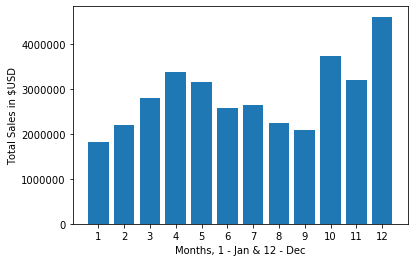

In [30]:
plt.bar(months, df_total_sales['total'])
plt.xticks(months) # shows every month here
plt.xlabel('Months, 1 - Jan & 12 - Dec')
plt.ylabel('Total Sales in $USD')
plt.show()

The months of `December` and `October`had the highest sales, and this could be due to the fact that October, November and December are the months of Halloween, American Thanksgiving and Christmas & New Years respectively. People usually spend a lot of money on gifts to family and friends around the holidays period in `December`, and therefore, this could be the main reason why December had the highest and January had the lowest sales (right after the holidays, so not a lot of reason to buy).

### Sales Analysis: What city had the highest number of sales?

In [31]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


In [32]:
# df = df.iloc[:, 0:-1] # when using iloc use , 0:-1 not ,[0:-1]
# df.head() # or use df[['col1', 'col2']]

# whenever we need to do something with the cell contents, we can use apply and lambda 
df['city'] = df['Purchase Address'].apply(lambda x: x.split(',')[1]) # for each of these cell contents 
df['state'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1]) 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,city,state
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,GA
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,WA
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,GA
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,GA
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,WA


In [33]:
df[['city']].head()

,city
0,Atlanta
1,Seattle
2,Atlanta
3,Atlanta
4,Seattle


In [34]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
total               float64
city                 object
state                object
dtype: object

In [35]:
df['city/state'] = df['city'].astype(str) + '/' + df['state'].astype(str)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,city,state,city/state
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,GA,Atlanta/GA
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,WA,Seattle/WA
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,GA,Atlanta/GA
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,GA,Atlanta/GA
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,WA,Seattle/WA


In [36]:
df.drop("city", axis = 1, inplace = True) # axis=1 means col, axis=0 means row

In [37]:
#df.drop("state", axis=1, inplace= True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,state,city/state
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,GA,Atlanta/GA
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,WA,Seattle/WA
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,GA,Atlanta/GA
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,GA,Atlanta/GA
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,WA,Seattle/WA


In [38]:
df_cities_grouped = df.groupby('city/state', as_index = False).sum()
df_cities_grouped

,city/state,Quantity Ordered,Price Each,month,total
0,Atlanta/GA,16602,2.779908e+06,104794,2.795499e+06
1,Austin/TX,11153,1.809874e+06,69829,1.819582e+06
2,Boston/MA,22528,3.637410e+06,141112,3.661642e+06
3,Dallas/TX,16730,2.752628e+06,104620,2.767975e+06
4,Los Angeles/CA,33289,5.421435e+06,208325,5.452571e+06
5,New York City/NY,27932,4.635371e+06,175741,4.664317e+06
6,Portland/ME,2750,4.471893e+05,17144,4.497583e+05
7,Portland/OR,11303,1.860558e+06,70621,1.870732e+06
8,San Francisco/CA,50239,8.211462e+06,315520,8.262204e+06
9,Seattle/WA,16553,2.733296e+06,104941,2.747755e+06


In [39]:
df_cities_grouped.columns

Index(['city/state', 'Quantity Ordered', 'Price Each', 'month', 'total'], dtype='object')

We can see that `city/state` is a column name when we set the as_index as False.

In [40]:
df_cities_grouped = df.groupby('city/state').sum()
df_cities_grouped

,Quantity Ordered,Price Each,month,total
city/state,,,,
Atlanta/GA,16602,2.779908e+06,104794,2.795499e+06
Austin/TX,11153,1.809874e+06,69829,1.819582e+06
Boston/MA,22528,3.637410e+06,141112,3.661642e+06
Dallas/TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles/CA,33289,5.421435e+06,208325,5.452571e+06
New York City/NY,27932,4.635371e+06,175741,4.664317e+06
Portland/ME,2750,4.471893e+05,17144,4.497583e+05
Portland/OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco/CA,50239,8.211462e+06,315520,8.262204e+06


In [41]:
df_cities_grouped.columns

Index(['Quantity Ordered', 'Price Each', 'month', 'total'], dtype='object')

This time we see that city/state is not a column name when we don't set the `as_index`.

In [42]:
# https://stackoverflow.com/questions/55652574/how-to-solve-keyerror-unone-of-index-dtype-object-are-in-the-colum

In [43]:
df_cities_grouped = df.groupby('city/state', as_index = False).sum()
df_cities_grouped.drop('month', axis = 1, inplace = True)

In [44]:
df_cities_grouped

,city/state,Quantity Ordered,Price Each,total
0,Atlanta/GA,16602,2.779908e+06,2.795499e+06
1,Austin/TX,11153,1.809874e+06,1.819582e+06
2,Boston/MA,22528,3.637410e+06,3.661642e+06
3,Dallas/TX,16730,2.752628e+06,2.767975e+06
4,Los Angeles/CA,33289,5.421435e+06,5.452571e+06
5,New York City/NY,27932,4.635371e+06,4.664317e+06
6,Portland/ME,2750,4.471893e+05,4.497583e+05
7,Portland/OR,11303,1.860558e+06,1.870732e+06
8,San Francisco/CA,50239,8.211462e+06,8.262204e+06
9,Seattle/WA,16553,2.733296e+06,2.747755e+06


In [45]:
df_cities_grouped = df_cities_grouped.sort_values(by = 'total', ascending = False)
df_cities_grouped

,city/state,Quantity Ordered,Price Each,total
8,San Francisco/CA,50239,8.211462e+06,8.262204e+06
4,Los Angeles/CA,33289,5.421435e+06,5.452571e+06
5,New York City/NY,27932,4.635371e+06,4.664317e+06
2,Boston/MA,22528,3.637410e+06,3.661642e+06
0,Atlanta/GA,16602,2.779908e+06,2.795499e+06
3,Dallas/TX,16730,2.752628e+06,2.767975e+06
9,Seattle/WA,16553,2.733296e+06,2.747755e+06
7,Portland/OR,11303,1.860558e+06,1.870732e+06
1,Austin/TX,11153,1.809874e+06,1.819582e+06
6,Portland/ME,2750,4.471893e+05,4.497583e+05


In [46]:
df_cities_grouped.dtypes

city/state           object
Quantity Ordered      int64
Price Each          float64
total               float64
dtype: object

We need to take care of the city/state column and convert it into str.

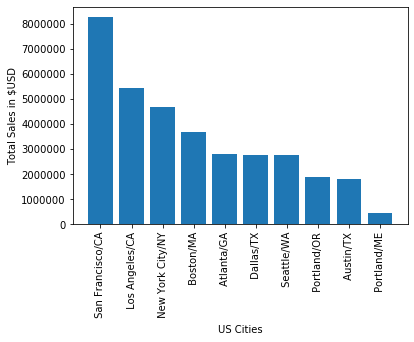

In [47]:
plt.bar(df_cities_grouped['city/state'], df_cities_grouped['total'])
plt.xticks(df_cities_grouped['city/state'], rotation = 'vertical', size = 10)
plt.xlabel('US Cities')
plt.ylabel('Total Sales in $USD')
plt.show()

We can clearly see that the big cities in the West and East Coast had the highest sales, with SF, LA and NY in top 3. This is mostly because the population is higher in these big urban cities in the US, and the average salary in SF, LA and NY are a lot higher than the other cities like Portland, OR and Portland, ME. 

### Sales Analysis: What is the best time to display advertisements to maximize the likelihood of customer's purchase?

In [48]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,state,city/state
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,GA,Atlanta/GA
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,WA,Seattle/WA
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,GA,Atlanta/GA
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,GA,Atlanta/GA
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,WA,Seattle/WA


`pd.to_datetime(df['col'])`

In [49]:
df['Order Date - DateTime'] = pd.to_datetime(df['Order Date']) # datatime uses more memory 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,state,city/state,Order Date - DateTime
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,GA,Atlanta/GA,2019-07-26 16:51:00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,WA,Seattle/WA,2019-07-05 08:55:00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,GA,Atlanta/GA,2019-07-29 12:41:00
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,GA,Atlanta/GA,2019-07-28 10:15:00
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,WA,Seattle/WA,2019-07-31 02:13:00


In [50]:
# create the hour and minute columns 
df['hour'] = df['Order Date - DateTime'].dt.hour 
df['minute'] = df['Order Date - DateTime'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,state,city/state,Order Date - DateTime,hour,minute
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,GA,Atlanta/GA,2019-07-26 16:51:00,16,51
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,WA,Seattle/WA,2019-07-05 08:55:00,8,55
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,GA,Atlanta/GA,2019-07-29 12:41:00,12,41
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,GA,Atlanta/GA,2019-07-28 10:15:00,10,15
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,WA,Seattle/WA,2019-07-31 02:13:00,2,13


Now that we have the hour and minute columns, we can group by using the `groupby()` function and see the total order values (sales) for different hours.  

In [51]:
best_time_df = df.groupby('hour', as_index = False).sum()
best_time_df = best_time_df[['hour', 'Quantity Ordered', 'total']]
best_time_df

,hour,Quantity Ordered,total
0,0,4428,713721.27
1,1,2619,460866.88
2,2,1398,234851.44
3,3,928,145757.89
4,4,937,162661.01
5,5,1493,230679.82
6,6,2810,448113.00
7,7,4556,744854.12
8,8,7002,1192348.97
9,9,9816,1639030.58


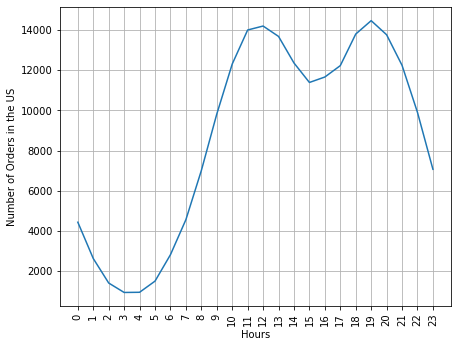

In [52]:
# to use a line chart 
# increase the plot size 
plt.rcParams['figure.figsize'] = (7, 5.5)
plt.plot(best_time_df['hour'], best_time_df['Quantity Ordered'])
plt.xticks(best_time_df['hour'], rotation = 'vertical', size = 10)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders in the US')
plt.show()

We can see that the peak time where customers buy products are around `11am` and `7pm` in the US. There are around 14,000 orders in 2019 at 11am and 7pm, therefore, it would be a good idea to advertise right before 11am and 7pm to maximize the likelihood of customer's buying a product.   

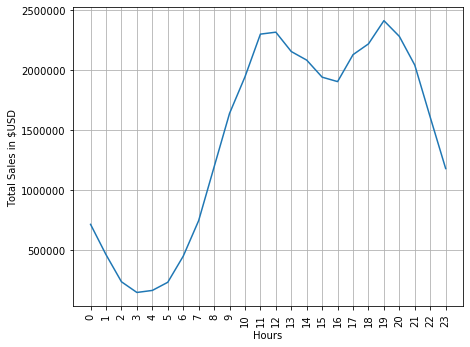

In [53]:
plt.plot(best_time_df['hour'], best_time_df['total'])
plt.xticks(best_time_df['hour'], rotation = 'vertical', size = 10)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Total Sales in $USD')
plt.show()

If we use total sales in the US to analyze our data, we can also see a similar trend where the total sales value in $USD is the highest around `11am` and `7pm` in the US. So, it would be a good idea to advertise before 11am and 7pm. 

### Sales Analysis: What products are most often sold together?

We can group the products sold with the same `Order ID`, and this will help us understand what products are often sold together.

In [54]:
df['Order ID'] = df['Order ID'].astype(str)
df.dtypes

Order ID                         object
Product                          object
Quantity Ordered                  int64
Price Each                      float64
Order Date                       object
Purchase Address                 object
month                             int64
total                           float64
state                            object
city/state                       object
Order Date - DateTime    datetime64[ns]
hour                              int64
minute                            int64
dtype: object

In [55]:
# get the df, df[] -> then filter for [df['Order ID'].duplicated()] # shift tab at the end of duplicated()
#df_same_orders = df[df['Order ID'].duplicated()]
df_same_orders = df[df.duplicated('Order ID', keep = False)] # keep = False ensures all duplicates are set as True, keep all duplicates
df_same_orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,state,city/state,Order Date - DateTime,hour,minute
118,223028,Vareebadd Phone,1,400.00,07/07/19 10:21,"969 10th St, San Francisco, CA 94016",7,400.00,CA,San Francisco/CA,2019-07-07 10:21:00,10,21
119,223028,USB-C Charging Cable,2,11.95,07/07/19 10:21,"969 10th St, San Francisco, CA 94016",7,23.90,CA,San Francisco/CA,2019-07-07 10:21:00,10,21
120,223028,Wired Headphones,1,11.99,07/07/19 10:21,"969 10th St, San Francisco, CA 94016",7,11.99,CA,San Francisco/CA,2019-07-07 10:21:00,10,21
140,223048,Vareebadd Phone,1,400.00,07/21/19 17:19,"168 8th St, Portland, OR 97035",7,400.00,OR,Portland/OR,2019-07-21 17:19:00,17,19
141,223048,USB-C Charging Cable,2,11.95,07/21/19 17:19,"168 8th St, Portland, OR 97035",7,23.90,OR,Portland/OR,2019-07-21 17:19:00,17,19


Now that we have the data frame where we have the same Order IDs and different products, we can combine them together.

In [56]:
# groupby the order ID, select the Product and join those Products by ' ' (empty space)
df_same_orders['Products Ordered Together'] = df_same_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [57]:
df_same_orders = df_same_orders[['Order ID', 'Products Ordered Together']] # choose these 2 cols 
df_same_orders.head()

,Order ID,Products Ordered Together
118,223028,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
119,223028,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
120,223028,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
140,223048,"Vareebadd Phone,USB-C Charging Cable"
141,223048,"Vareebadd Phone,USB-C Charging Cable"


We also need to drop the rows with same Order ID.

In [58]:
df_same_orders = df_same_orders.drop_duplicates() # drop except for the first as default, 
df_same_orders

,Order ID,Products Ordered Together
118,223028,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
140,223048,"Vareebadd Phone,USB-C Charging Cable"
188,223095,"Apple Airpods Headphones,AA Batteries (4-pack)"
201,223106,"Wired Headphones,Vareebadd Phone"
213,223117,"Google Phone,USB-C Charging Cable"
230,223133,"AA Batteries (4-pack),AAA Batteries (4-pack)"
238,223140,"AA Batteries (4-pack),Flatscreen TV"
243,223144,"Google Phone,USB-C Charging Cable"
310,223210,"AA Batteries (4-pack),27in FHD Monitor"
323,223221,"Wired Headphones,Macbook Pro Laptop"


In [59]:
from itertools import combinations 
from collections import Counter 

count = Counter()

for row in df_same_orders['Products Ordered Together']:
    #print(row) # prints all the Vareebadd Phone USB-C Charging Cable Wired Head etc
    row_list = row.split(',')
    #print(row_list) # ['Vareebadd', 'Phone', 'USB-C', 'Charging', 'Cable', 'Wired', 'Headphones']
    count.update(Counter(combinations(row_list, 2)))
print(count.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


This shows us that the most common products purchased together were `iPhone` and `Lightning Charging Cable`. So, it might be a good idea to have some sort of a promotion, or recommondation to buy the other item when someone is about to purchase one of these items.

### Sales Analysis: What product sold the most?

In [60]:
df_product_grouped = df.groupby("Product", as_index = False).sum().iloc[:, [0,1]] # loc[:, [0,1,2]] doesnt work
df_product_grouped

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


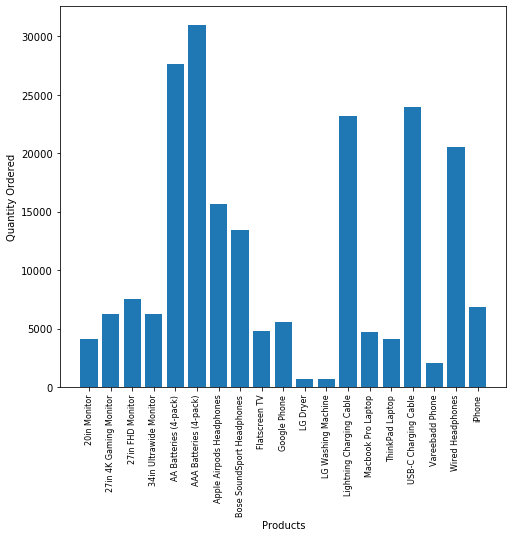

In [61]:
plt.rcParams['figure.figsize'] = (8, 7)
plt.bar(df_product_grouped['Product'], df_product_grouped['Quantity Ordered'])
plt.xticks(df_product_grouped['Product'], rotation = 'vertical', size = 8)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.show()

The products sold the most were AAA Batteries and AA Batteries, because these items are much more affordable and cheaper than the items like LG Dryer and LG Washing Machine. Another thing to consider is that these cheap items such as batteries or lightning cables are very common and cheap household items, and they are not very easily repairable when they are broken. However, on the other hand, LG machines are much more expensive and when they are broken, people don't usually purchase a new one, they try to get them fixed.

In [62]:
df_prices_grouped = df.groupby("Product").mean()["Price Each"]
df_prices_grouped

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

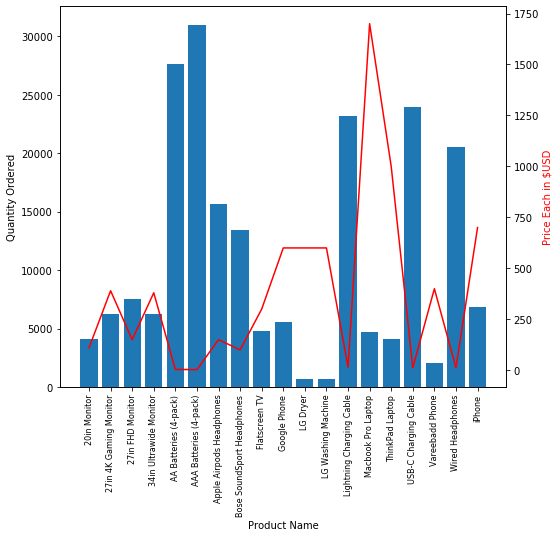

In [63]:
plt.rcParams['figure.figsize'] = (8, 7)

plot, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(df_product_grouped['Product'], df_product_grouped['Quantity Ordered'])
ax2.plot(df_product_grouped['Product'], df_prices_grouped, color = 'r')


ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered")

ax2.set_ylabel("Price Each in $USD", color = 'r')

ax1.set_xticklabels(df_product_grouped['Product'], rotation = 'vertical', size = 8)


plot.show()

In [64]:
# df_cities_grouped = df.groupby(['city', 'state']).sum()
# df_cities_grouped 

In [65]:
# df_cities_grouped = df_cities_grouped.sort_values(by = 'total', ascending = False)
# df_cities_grouped

In [66]:
# df_cities_grouped[['city/state']] = df_cities_grouped[['city']] + '/' + df_cities_grouped[['state']]
# df_cities_grouped

In [67]:
# def combine_city_state(x):
#     print(x)

# df_cities_grouped['city'] = df_cities_grouped['city', 'state'].apply(lambda x: combine_city_state(x))
# cities = df_cities_grouped[['city'].unique()
# print(cities)

# c = []
# for x in df_cities_grouped['city']:
#     c.append(x)

# # plt.bar(df_cities_grouped['city'], df_cities_grouped['total'])
# # plt.xticks(df_cities_grouped['city'])
# # plt.xlabel('US Cities')
# # plt.ylabel('Total Sales in $USD')
# # plt.show()